## Extensión de la campaña "Seguro Vivienda" de compañía financiera

Tras el éxito obtenido con la campaña "Seguro Vivienda", la compañía ha decidido aplicar de nuevo el Aprendizaje Automático para comprender mejor los hábitos y necesidades de sus clientes.

El objetivo de este nuevo estudio es agrupar a los clientes en distintos "clusters" para que el equipo comercial intente determinar posteriormente qué tipo de productos se adaptan mejor a cada uno de los clusters obtenidos.

Se desconoce el número de clusters óptimo, por lo que el experto en Aprendizaje Automático tendrá que explorar un rango de valores razonable y respaldar sus conclusiones con métricas y gráficas apropiadas.

# **Mi Codigo** #

importamos las librerias con las que vamos a trabajar

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from math import pi
from datetime import datetime
import os

llamamos las rutas donde tenemos los siguientes dataset:

* Clientes_train
* Clientes_test
* Zonas 

lo primero que haremos es llamar los dataset de *Clientes_train* y *Zonas*

In [82]:
datos_path = r'./data' #Carpeta donde tenemos los datasets

clientes_file = 'Clientes_train.csv'
zonas_file = 'Zonas.csv'
clientes_test = 'Clientes_test.csv'

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')
clientes_test = pd.read_csv(os.path.join(datos_path, clientes_test), sep='\t')

validamos los dataset para ver que variables tienen y la cantidad de datos de cada variable 

In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Cliente           2999 non-null   object 
 1   Fecha_Nacimiento     2999 non-null   object 
 2   Fecha_Alta           2999 non-null   object 
 3   Sexo                 2999 non-null   object 
 4   ID_Zona              2999 non-null   object 
 5   Productos_Vida       2999 non-null   int64  
 6   Productos_Vehiculos  2999 non-null   int64  
 7   Productos_Otros      2999 non-null   int64  
 8   Gasto_Vida           2999 non-null   float64
 9   Gasto_Vehiculos      2999 non-null   float64
 10  Gasto_Otros          2999 non-null   float64
 11  Seguro_Vivienda      2999 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 260.8+ KB


In [4]:
zonas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Zona                              1204 non-null   object 
 1   Tipo_Familia                         1204 non-null   float64
 2   Tipo_Pareja                          1204 non-null   float64
 3   Tipo_Soltero                         1204 non-null   float64
 4   Educacion_Superior                   1204 non-null   float64
 5   Educacion_Media                      1204 non-null   float64
 6   Educacion_Baja                       1204 non-null   float64
 7   Poblacion_Empresario                 1204 non-null   float64
 8   Poblacion_Funcionario                1204 non-null   float64
 9   Poblacion_Trabajador_Cualificado     1204 non-null   float64
 10  Poblacion_Trabajador_No_Cualificado  1204 non-null   float64
 11  Vivienda_Propiedad            

Se evidencia que el dataset de ***clientes*** cuenta con 10 variables, 5 categoricas y 7 numericas, tambien se evidencia que tenemos 2999 datos por variable, el dataset de ***Zonas*** cuenta con 18 variables 1 categorica y 17 numericas, contando con 1204 datos por variable.

vemos que en ambos dataset cuentan con la variable ***ID_Zona*** que referencia los datos de ambos datasets

unimos los dataset referenciando la columna ***ID_Zona*** en ambos dataset y usaremos *Inner* para que al momento de unir los datasets, solo se conserven las filas donde coincida el ***Id_Zona*** de ambos datasets

In [5]:
data = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

data.head(10)

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,...,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,...,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,...,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,...,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66
5,C1869,11/01/1958,27/10/1981,Hombre,Z1082,0,0,1,0.00,0.00,...,26.95,3.08,62.51,65.12,34.88,4.89,95.11,0.00,6.87,93.12
6,C0342,19/02/1962,04/12/1985,Mujer,Z1168,0,0,0,0.00,0.00,...,29.04,25.28,42.70,7.68,92.32,8.49,91.51,0.00,0.00,100.00
7,C3539,09/02/1985,05/08/2006,Hombre,Z1804,0,1,2,0.00,1007.35,...,52.12,31.78,7.77,92.70,7.30,40.29,59.71,0.00,0.00,100.01
8,C2877,05/11/1966,19/11/1988,Hombre,Z0789,0,1,3,0.00,6712.59,...,78.99,0.00,0.00,100.00,0.00,20.08,79.92,0.00,0.00,100.00
9,C3127,13/07/1983,29/04/2005,Hombre,Z0664,0,0,2,0.00,0.00,...,20.79,42.27,36.93,16.11,83.89,1.91,98.09,0.00,0.00,100.01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           2927 non-null   object 
 1   Fecha_Nacimiento                     2927 non-null   object 
 2   Fecha_Alta                           2927 non-null   object 
 3   Sexo                                 2927 non-null   object 
 4   ID_Zona                              2927 non-null   object 
 5   Productos_Vida                       2927 non-null   int64  
 6   Productos_Vehiculos                  2927 non-null   int64  
 7   Productos_Otros                      2927 non-null   int64  
 8   Gasto_Vida                           2927 non-null   float64
 9   Gasto_Vehiculos                      2927 non-null   float64
 10  Gasto_Otros                          2927 non-null   float64
 11  Seguro_Vivienda               

ahora tenemos un dataset con 29 columnas, con 5 variables categoricas y 24 numericas, tenemos un total de 2927 registros 

validamos que no tengamos datos nulos

In [7]:
data.isnull().sum()

ID_Cliente                             0
Fecha_Nacimiento                       0
Fecha_Alta                             0
Sexo                                   0
ID_Zona                                0
Productos_Vida                         0
Productos_Vehiculos                    0
Productos_Otros                        0
Gasto_Vida                             0
Gasto_Vehiculos                        0
Gasto_Otros                            0
Seguro_Vivienda                        0
Tipo_Familia                           0
Tipo_Pareja                            0
Tipo_Soltero                           0
Educacion_Superior                     0
Educacion_Media                        0
Educacion_Baja                         0
Poblacion_Empresario                   0
Poblacion_Funcionario                  0
Poblacion_Trabajador_Cualificado       0
Poblacion_Trabajador_No_Cualificado    0
Vivienda_Propiedad                     0
Vivienda_Alquiler                      0
Medico_Seguro_Pr

In [8]:
  data.describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


Sacamos informacion estadistica basica de las variables numericas, como los valores minimos, maximos, cuartiles, etc.

saber la cantidad de clientes con seguro de vivienda 

In [9]:
Clientes_SegVivienda = data['Seguro_Vivienda'].sum()

Clientes_SegVivienda

165

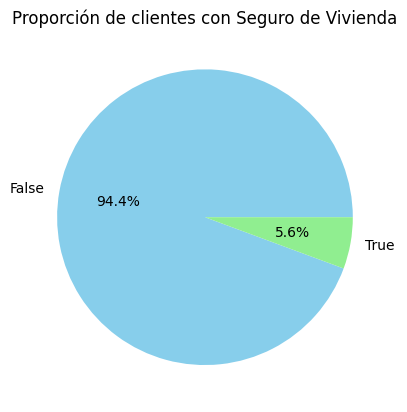

In [10]:
data["Seguro_Vivienda"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightgreen"])
plt.title("Proporción de clientes con Seguro de Vivienda")
plt.ylabel("")
plt.show()

saber la cantidad de clientes que tienen productos 

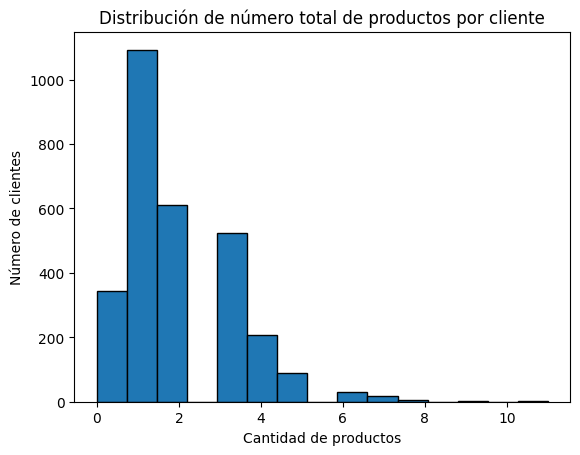

In [11]:
Total_Productos = data[['Productos_Vida','Productos_Vehiculos','Productos_Otros']].sum(axis=1)

plt.hist(Total_Productos, bins=15, edgecolor='Black')
plt.title("Distribución de número total de productos por cliente")
plt.xlabel("Cantidad de productos")
plt.ylabel("Número de clientes")
plt.show()

In [12]:
print(data["Sexo"].value_counts())

Sexo
Hombre    2125
Mujer      802
Name: count, dtype: int64


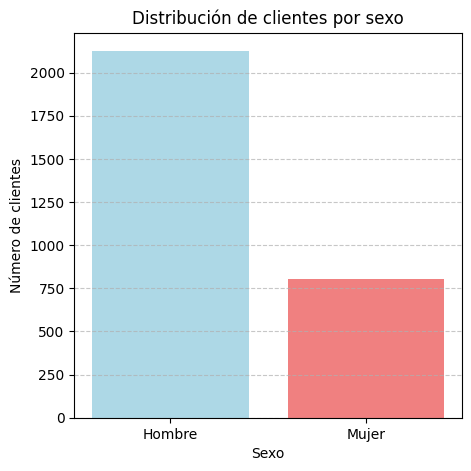

In [13]:
sexo = data["Sexo"].value_counts()

plt.figure(figsize=(5,5))
plt.bar(sexo.index, sexo.values, color=["lightblue", "lightcoral"])
plt.title("Distribución de clientes por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

podemos calcular edad con la variable de Fecha_Nacimiento para poder hacer analisis de clientes por edad 

In [14]:
data['Fecha_Nacimiento'] = pd.to_datetime(data['Fecha_Nacimiento'], errors='coerce')
data["Edad"] = (datetime.now() - data["Fecha_Nacimiento"]).dt.days // 365
print(data["Edad"].describe())

count    2927.000000
mean       58.206696
std        13.409833
min        35.000000
25%        47.000000
50%        59.000000
75%        70.000000
max        81.000000
Name: Edad, dtype: float64


C:\Users\johan\AppData\Local\Temp\ipykernel_18308\2687784556.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Fecha_Nacimiento'] = pd.to_datetime(data['Fecha_Nacimiento'], errors='coerce')


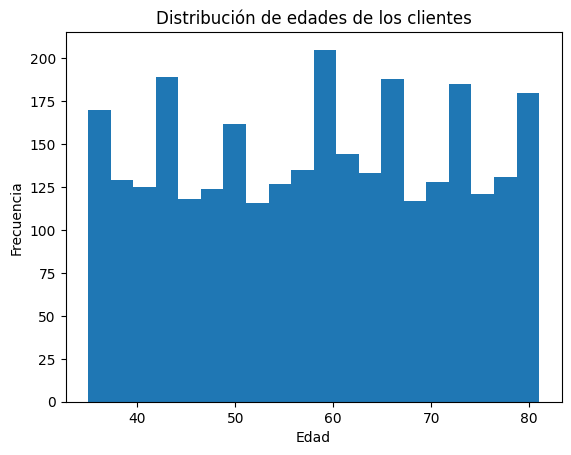

In [15]:
plt.hist(data["Edad"], bins=20)
plt.title("Distribución de edades de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

podemos calcular antiguedad de cliente con la variable de Fecha_alta

In [16]:
data["Fecha_Alta"] = pd.to_datetime(data["Fecha_Alta"], errors='coerce')
data["Antiguedad"] = (datetime.now() - data["Fecha_Alta"]).dt.days // 365
print(data["Antiguedad"].describe())

count    2927.000000
mean       36.426375
std        13.319281
min        16.000000
25%        24.000000
50%        37.000000
75%        48.000000
max        61.000000
Name: Antiguedad, dtype: float64


C:\Users\johan\AppData\Local\Temp\ipykernel_18308\2537913105.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Fecha_Alta"] = pd.to_datetime(data["Fecha_Alta"], errors='coerce')


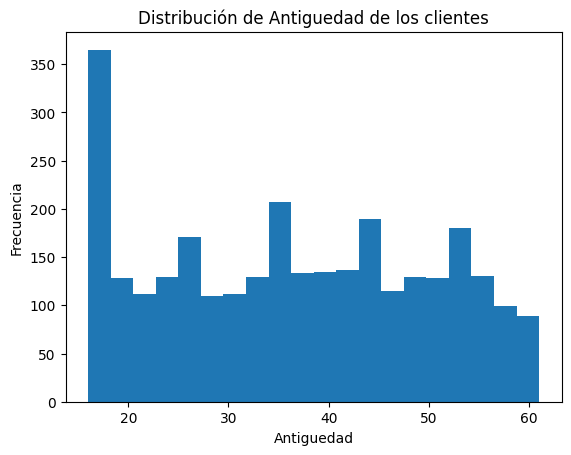

In [17]:
plt.hist(data["Antiguedad"], bins=20)
plt.title("Distribución de Antiguedad de los clientes")
plt.xlabel("Antiguedad")
plt.ylabel("Frecuencia")
plt.show()

podemos ver la distribucion por zona de los clientes

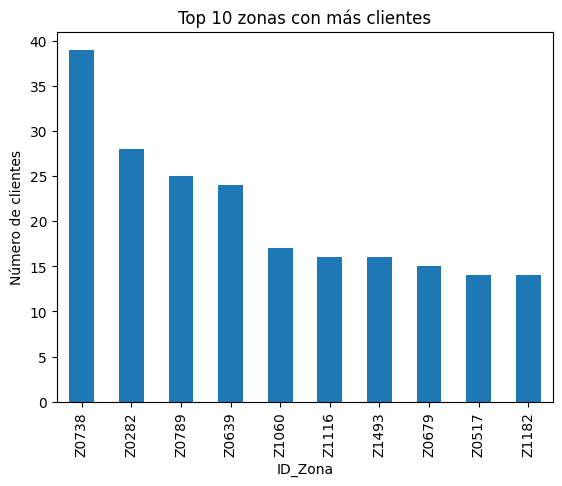

In [18]:
data["ID_Zona"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 zonas con más clientes")
plt.xlabel("ID_Zona")
plt.ylabel("Número de clientes")
plt.show()

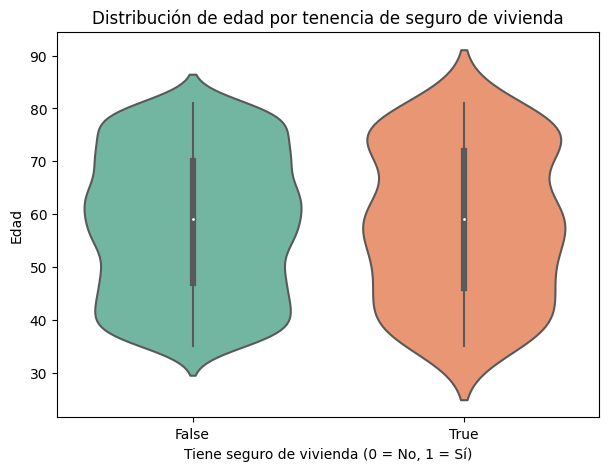

In [19]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Seguro_Vivienda", y="Edad", data=data, palette="Set2")
plt.title("Distribución de edad por tenencia de seguro de vivienda")
plt.xlabel("Tiene seguro de vivienda (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

In [20]:
demanda_zona = (
    data.groupby('ID_Zona')['Seguro_Vivienda']
    .mean()
    .reset_index()
    .rename(columns={'Seguro_Vivienda': 'demanda_Seguro'})
)

demanda_zona['demanda_Seguro'] = (demanda_zona['demanda_Seguro'] * 100).round(2)

print('Zonas con mayor demanda:')
print(demanda_zona.sort_values(by='demanda_Seguro', ascending=False).head(10))


Zonas con mayor demanda:
     ID_Zona  demanda_Seguro
534    Z0872           100.0
868    Z1424           100.0
765    Z1232           100.0
1044   Z1771           100.0
592    Z0987           100.0
916    Z1513           100.0
396    Z0642           100.0
810    Z1301           100.0
54     Z0112           100.0
524    Z0854           100.0


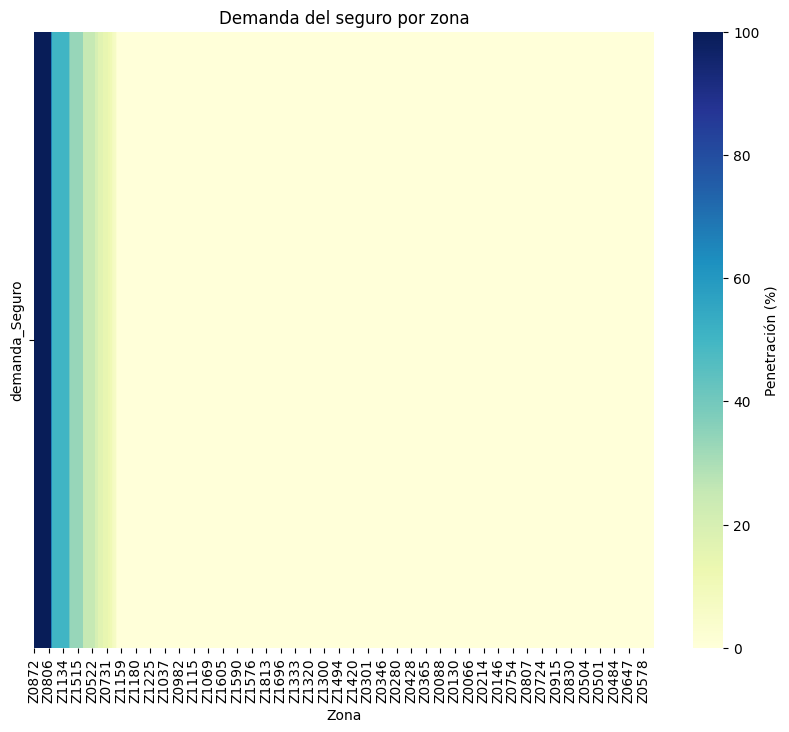

In [21]:
plt.figure(figsize=(10,8))
demanda_orden = demanda_zona.sort_values(by="demanda_Seguro", ascending=False)
sns.heatmap(
    demanda_orden.set_index("ID_Zona").T,
    cmap="YlGnBu",
    cbar_kws={'label': 'Penetración (%)'}
)
plt.title("Demanda del seguro por zona")
plt.xlabel("Zona")
plt.ylabel("")
plt.show()

Ahora Procederemos a agrupar los clientes en ***clusters homogeneos***, de forma que el equipo comercial pueda realizar los siguientes estudios:

* Identificar perfiles de clientes
* Entender que tipo de productos o estrategias se adoptan mejor a cada grupo
* Diseñar campañas personalizadas de marketing y retencion 

lo primero que haremos sera eliminar las variables categoricas de *fecha_de_nacimiento* y *fecha_de_alta*, ya que ya tenemos las variables de *edad* y *antiguedad*, tambien convertiremos la variable de *Sexo* que es categorica en numerica 

In [22]:
data = data.drop(['Fecha_Nacimiento','Fecha_Alta'], axis=1)

Ahora convertiremos la variable de ***Sexo*** en numerica, cambiaremos los valores de *Hombre* = 1 y *Mujer* = 0

In [23]:
data["Sexo"] = data["Sexo"].map({"Hombre": 1, "Mujer": 0})

Si queremos usar tambien la columna de zona para aportar informacion territorial tambien tenemos que convertirla a numerica, en este caso vamos a agregar una nueva columna asignado un numero a cada *ID_Zona*

In [25]:
encoder = LabelEncoder()
data["ID_Zona_Num"] = encoder.fit_transform(data["ID_Zona"])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           2927 non-null   object 
 1   Sexo                                 2927 non-null   int64  
 2   ID_Zona                              2927 non-null   object 
 3   Productos_Vida                       2927 non-null   int64  
 4   Productos_Vehiculos                  2927 non-null   int64  
 5   Productos_Otros                      2927 non-null   int64  
 6   Gasto_Vida                           2927 non-null   float64
 7   Gasto_Vehiculos                      2927 non-null   float64
 8   Gasto_Otros                          2927 non-null   float64
 9   Seguro_Vivienda                      2927 non-null   bool   
 10  Tipo_Familia                         2927 non-null   float64
 11  Tipo_Pareja                   

Ahora lo mas importante es escoger las variables que nos van a ayudar a describir el perfil del cliente 

debido a las variables que tenemos podemos dividir los perfiles en tres grupos 

* **Demografico** : Sexo, Edad, Antiguedad
* **Socioeconomicos**: Ingresos_Mas_De_40000, Ingresos_De_20000_Hasta_40000, Ingresos_Hasta_20000, Educacion_Superior, Educacion_Media, Educacion_Baja, Poblacion_Empresario, Poblacion_Funcionario,Poblacion_Trabajador_Cualificado, Poblacion_Trabajador_No_Cualificado, Zona
* **Familia, Vivienda y Salud**: Tipo_Familia, Tipo_Pareja, Tipo_Soltero, Vivienda_Propiedad, Vivienda_Alquiler, Medico_Seguro_Privado, Medico_Seguridad_Social
* **Comportamiento Financiero**: Productos_Vida, Productos_Vehiculos, Productos_Otros, Gasto_Vida, Gasto_Vehiculos, Gasto_Otros

In [55]:
variables_cluster = [
    #"Sexo", 
    "Edad", "Antiguedad", #"ID_Zona_Num",
    "Ingresos_Mas_De_40000", 
    "Ingresos_De_20000_Hasta_40000", "Ingresos_Hasta_20000",
    "Educacion_Superior", #"Educacion_Media", "Educacion_Baja",
    #"Productos_Vida", "Productos_Vehiculos", "Productos_Otros",
    #"Gasto_Vida", 
    "Gasto_Vehiculos", #"Gasto_Otros",
    "Vivienda_Propiedad", "Vivienda_Alquiler", "Seguro_Vivienda"
]


Debemos escalar los datos para que todas las variables tengan la misma importancia 

In [56]:
X = data[variables_cluster]

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Realizamos una matriz de correlacion para ver que no tengamos variables que aporten informacion duplicada o muy correlacionada, en dado caso que tengamos algo asi, podemos eliminar una de las variables muy correlacionadas 

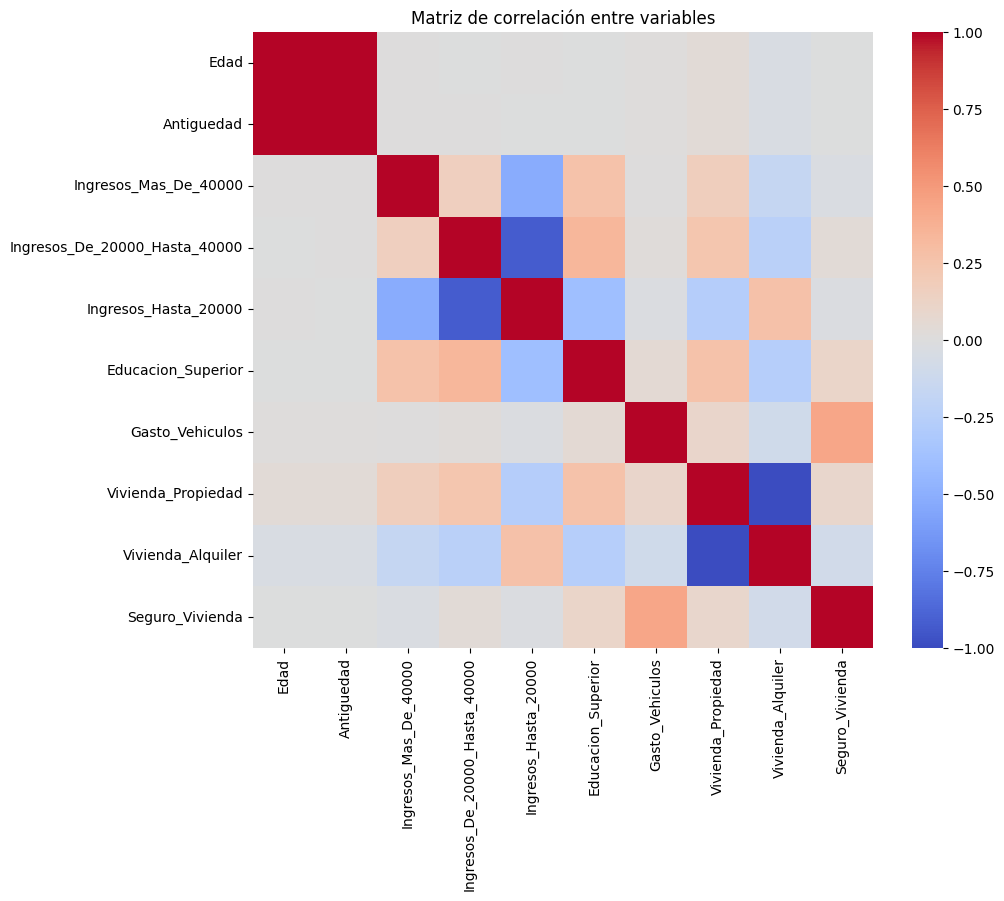

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()

Por el momento no tenemos variables muy correlacionadas por lo cual trabajaremos con las variables escogidas, despues podemos ver que variables son las que mas aportan a los clusters

### Uso de K-Means ###

Ahora determinaremos el numero optimo de Clusters, evaluando la 'inercia' para distintos valores de K 

In [59]:
inercia = []
K = range(1, 11)

In [60]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

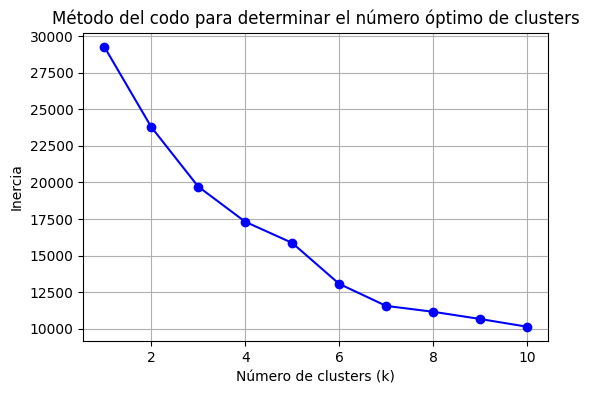

In [61]:
plt.figure(figsize=(6,4))
plt.plot(K, inercia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

De acuerdo a la grafica *Metodo Codo*, vemos que la curva donde inicia a doblarse sera el numero optimo de los clusters, en nuestro caso se observa una caida pronunciada hasta K = 4 o 5, despues se ve que la reduccion de inercia es menor, lo que se sugiere que 4 o 5 es un buen numero para segmentar los clientes 

Entrenamos el modelo con 5 clusters

In [62]:
# Entrenar modelo final con k=5
kmeans_final = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(X_scaled)

In [63]:
# Centroides y tamaño de cada grupo
centroides = pd.DataFrame(kmeans_final.cluster_centers_, columns=X.columns)
conteo = data['Cluster'].value_counts().sort_index()

In [64]:
print("Tamaño de cada cluster:")
print(conteo)
print("\nCentroides normalizados:")
print(centroides)

Tamaño de cada cluster:
Cluster
0    1026
1     322
2     755
3     824
Name: count, dtype: int64

Centroides normalizados:
       Edad  Antiguedad  Ingresos_Mas_De_40000  Ingresos_De_20000_Hasta_40000  \
0 -0.091019   -0.095033              -0.200740                      -0.325960   
1 -0.033715   -0.031085               1.243237                       2.140744   
2 -0.900062   -0.902089              -0.135104                      -0.226513   
3  0.951200    0.957028              -0.112088                      -0.223140   

   Ingresos_Hasta_20000  Educacion_Superior  Gasto_Vehiculos  \
0              0.358644           -0.291240        -0.141663   
1             -2.326773            1.286208         0.044959   
2              0.247559           -0.084777         0.110754   
3              0.235856           -0.062306         0.057343   

   Vivienda_Propiedad  Vivienda_Alquiler  Seguro_Vivienda  
0           -1.166220           1.166220        -0.138768  
1            0.812674        

Podemos sacar las variables que mas aportan a los clusters

In [65]:
f_values, p_values = f_classif(X_scaled, data['Cluster'])
importancia = pd.DataFrame({'Variable': X.columns, 'F_value': f_values}).sort_values(by='F_value', ascending=False)
print(importancia.head(10))

                        Variable      F_value
7             Vivienda_Propiedad  2760.911359
8              Vivienda_Alquiler  2760.911359
4           Ingresos_Hasta_20000  1997.436329
3  Ingresos_De_20000_Hasta_40000  1284.459928
1                     Antiguedad   867.573433
0                           Edad   852.667125
5             Educacion_Superior   266.337809
2          Ingresos_Mas_De_40000   232.131409
6                Gasto_Vehiculos    11.182338
9                Seguro_Vivienda    10.927663


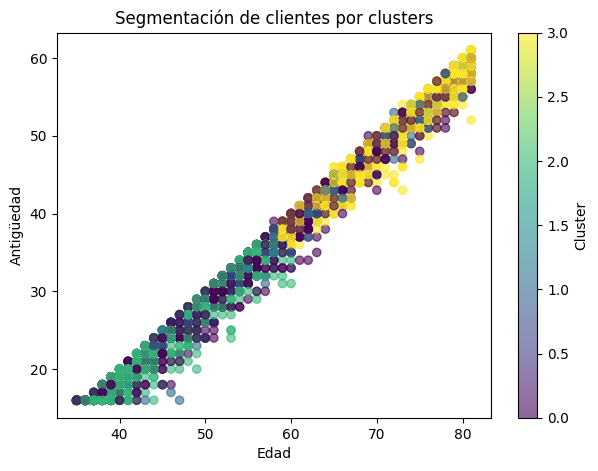

In [66]:
# Visualización rápida (por edad y antigüedad)
plt.figure(figsize=(7,5))
plt.scatter(data['Edad'], data['Antiguedad'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Antigüedad')
plt.title('Segmentación de clientes por clusters')
plt.colorbar(label='Cluster')
plt.show()

En el grafico vemos una fuerte correlacion entre Edad y Antiguedad, lo cual explica porque se ve una linea diagonal tan marcada, es decir que los clientes mas jovenes son tambien los mas nuevos, y los clientes de mas edad llevan mas tiempo en la compañia 

In [67]:
# Promedio de cada variable por cluster
resumen_clusters = data.groupby('Cluster')[X.columns].mean().round(2)
print(resumen_clusters)

          Edad  Antiguedad  Ingresos_Mas_De_40000  \
Cluster                                             
0        56.99       35.16                   0.37   
1        57.75       36.01                   8.12   
2        46.14       24.41                   0.73   
3        70.96       49.17                   0.85   

         Ingresos_De_20000_Hasta_40000  Ingresos_Hasta_20000  \
Cluster                                                        
0                                 2.73                 96.90   
1                                32.79                 59.10   
2                                 3.94                 95.33   
3                                 3.98                 95.17   

         Educacion_Superior  Gasto_Vehiculos  Vivienda_Propiedad  \
Cluster                                                            
0                      8.70          1298.81               10.43   
1                     38.13          1673.60               84.38   
2                     12

podemos notar lo siguiente:

* **Cluster 0**: Clase media, jovenes propietarios - Clientes relativamente jóvenes, estables, con un nivel educativo medio-bajo, que tienden a tener propiedad y cierto gasto en vehículos. Potenciales para productos de vida y seguros complementarios
* **Cluster 1** Jovenes en alquiler, bajos ingresos - Clientes dependiente del crédito, menor gasto promedio. Interesante para productos de microseguros o planes básicos
* **Cluster 2** Adultos con capacidad media-alta - más activos económicamente, mayor diversificación en productos. Buen objetivo para cruzar productos y fidelizar
* **Cluster 3** Profesional de altos ingresos - clientes maduros, con educación alta, ingresos sólidos y gasto elevado. Son candidatos ideales para productos de inversión, seguros de vida completos o planes familiares
* **Cluster 4** Mayores con estabilidad economica - Segmento de clientes sénior consolidados, que ya no amplían cartera pero son fieles. Enfocar en renovaciones, planes de salud, seguros de retiro

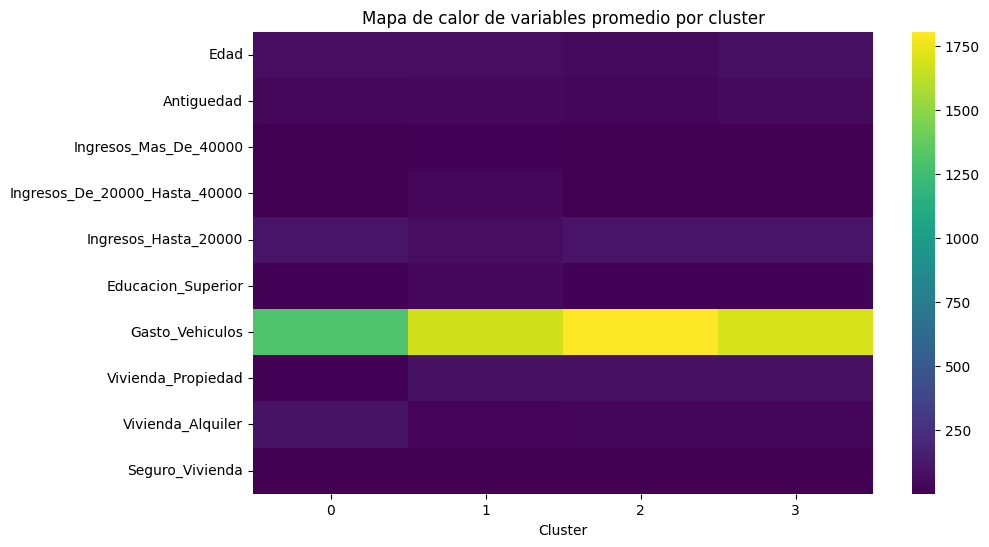

In [68]:
resumen_clusters_T = resumen_clusters.T
plt.figure(figsize=(10,6))
sns.heatmap(resumen_clusters_T, cmap="viridis", annot=False)
plt.title("Mapa de calor de variables promedio por cluster")
plt.show()

Tambien podemos verlo en un mapa de calor, en el grafico podemos ver que variables dominan en cada grupo, podemos apreciar:

* Gasto_Vehículos es la variable que más resalta (amarillo intenso), esto significa que hay un grupo que gasta significativamente más en vehículos.
* Gasto_Vida también tiene un punto claro en otro cluster, indica que ese grupo invierte más en seguros o productos de vida.
* Las variables como Sexo, Edad, Antigüedad, y Educación aparecen muy oscuras, lo que sugiere que sus promedios no difieren tanto entre clusters.

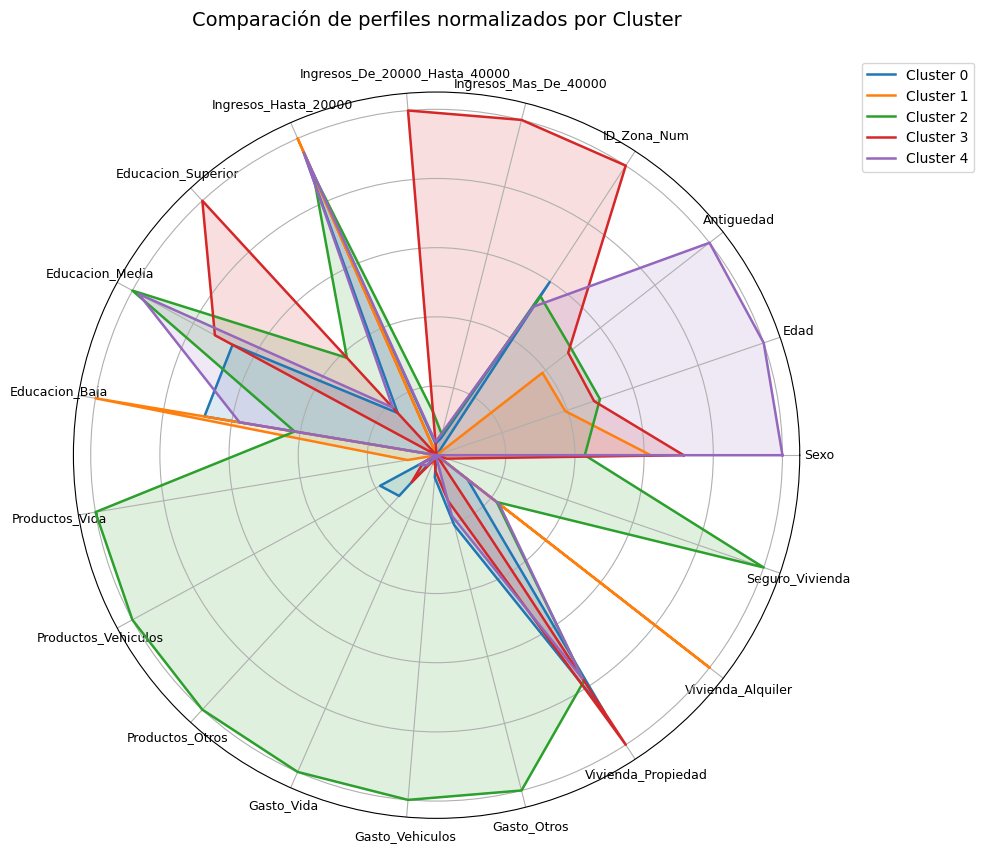

In [71]:
#try:
    #resumen_clusters  # si ya existe, no hacemos nada
#except NameError:
    # Ajusta 'variables_cluster' si no está definido
    #variables_cluster = [
        #"Sexo", "Edad", "Antiguedad", "ID_Zona_Num",
        #"Ingresos_Mas_De_40000", "Ingresos_De_20000_Hasta_40000", "Ingresos_Hasta_20000",
        #"Educacion_Superior", "Educacion_Media", "Educacion_Baja",
        #"Productos_Vida", "Productos_Vehiculos", "Productos_Otros",
        #"Gasto_Vida", "Gasto_Vehiculos", "Gasto_Otros",
        #"Vivienda_Propiedad", "Vivienda_Alquiler"
    #]
    #resumen_clusters = datos.groupby('Cluster')[variables_cluster].mean()

#Normalizar (Min-Max) por columna para comparar variables en la misma escala
#scaler = MinMaxScaler()
#resumen_norm = pd.DataFrame(
    #scaler.fit_transform(resumen_clusters),
    #index=resumen_clusters.index,
    #columns=resumen_clusters.columns
#)

# Preparar los ángulos para el radar
labels = resumen_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

# Dibujar radar comparativo para todos los clusters
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

colors = plt.cm.tab10.colors  # paleta de 10 colores
for i, idx in enumerate(resumen_norm.index):
    values = resumen_norm.loc[idx].values.flatten().tolist()
    values += values[:1]  # cerrar el círculo
    ax.plot(angles, values, label=f'Cluster {idx}', color=colors[i % len(colors)], linewidth=1.8)
    ax.fill(angles, values, alpha=0.15, color=colors[i % len(colors)])

# Etiquetas y formato
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticklabels([])  # ocultar etiquetas radiales (opcional)
ax.set_title('Comparación de perfiles normalizados por Cluster', y=1.08, fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05))
plt.tight_layout()
plt.show()

Tambien generamos un grafico de radar para ver que es lo que mas destaca o diferencia de cada cluster respecto a los demas, por ejemplo en el cluster 2, se ve que hay picos altos en gastos de vehiculos, gastos de vida, etc. son los clientes con capacidad media-alta con mayor diversificación en productos

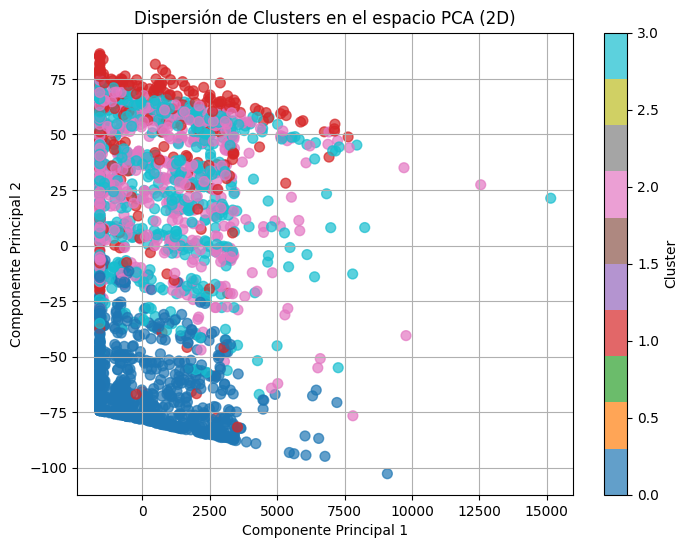

In [72]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[variables_cluster])

# Agregar resultados al DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Graficar
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data['PCA1'], data['PCA2'],
    c=data['Cluster'], cmap='tab10', alpha=0.7, s=50
)

plt.title('Dispersión de Clusters en el espacio PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


# Comparacion de K-means con DBScan

aplicamos DBScan

In [73]:
# Ajustar modelo DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10) 
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agregar etiquetas al DataFrame
data['Cluster_DBSCAN'] = dbscan_labels

# Cuántos clusters detectó (sin contar ruido)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Número de clusters detectados por DBSCAN: {n_clusters}")
print(f"Número de puntos marcados como ruido: {sum(dbscan_labels == -1)}")

Número de clusters detectados por DBSCAN: 2
Número de puntos marcados como ruido: 271


Vemos que DBScan detecta 9 clusteres, es decir 9 grupos de clientes distintos, a diferencia de K-means, uno indica cual es el numero de clusters basado en el grafico de codo, aca el mismo indica cuales son los grupos automaticamente.

El numero de puntos marcados como ruido, son los clientes que no entran dentro de ningun cluster, DBSCAN los marca como -1 porque no tienen suficientes vecinos cercanos para ser considerados parte de un grupo

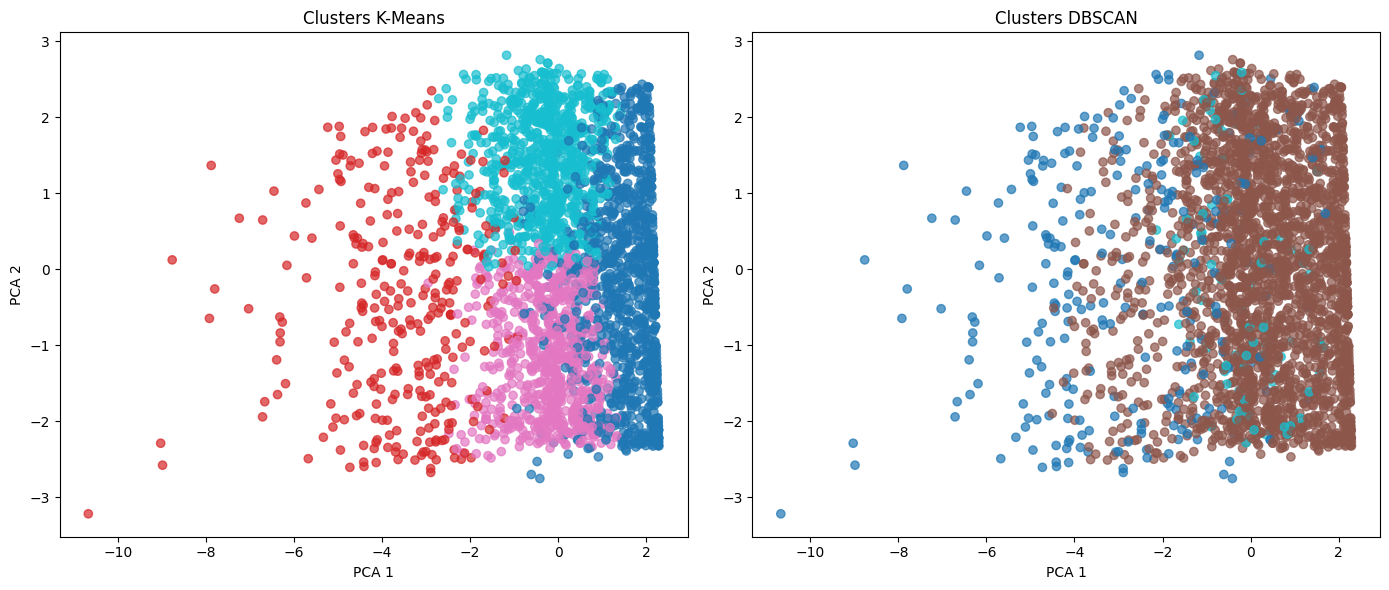

In [74]:
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(14,6))

# K-Means
plt.subplot(1,2,1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=data['Cluster'], cmap='tab10', alpha=0.7)
plt.title('Clusters K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# DBSCAN
plt.subplot(1,2,2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=data['Cluster_DBSCAN'], cmap='tab10', alpha=0.7)
plt.title('Clusters DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

generamos dos graficos de distribucion para ver la diferencia entre K-Means y DBSCAN 

In [75]:
print("Distribución de clientes por cluster (K-Means):")
print(data['Cluster'].value_counts())

print("\nDistribución de clientes por cluster (DBSCAN):")
print(data['Cluster_DBSCAN'].value_counts())

Distribución de clientes por cluster (K-Means):
Cluster
0    1026
3     824
2     755
1     322
Name: count, dtype: int64

Distribución de clientes por cluster (DBSCAN):
Cluster_DBSCAN
 0    2571
-1     271
 1      85
Name: count, dtype: int64


tambien vemos mas a detalle la distribucion entre los clusters de K-Means y DBSCAN y podemos concluir lo siguiente 

K-Means logra agrupar todos los clientes en 5 clusters, no deja a ningun por fuera, la distribucion tienen algunos grupos grandes y otros mas pequeños, por lo que sugiere que los clienytes tienen patrones continuos.

Mientras DBSCAN detecto 9 grupos de clientes, pero detecto muchos clientes como ruido, y los clusters generados son pequeños

In [76]:
# Proporción de coincidencia entre métodos
coincidencia = np.mean(data['Cluster'] == data['Cluster_DBSCAN'])
print(f"Coincidencia aproximada entre K-Means y DBSCAN: {coincidencia:.2f}")


Coincidencia aproximada entre K-Means y DBSCAN: 0.34


Tambien podemos ver que las agrupaciones entre K-Means y DBSCAN no coinciden en casi nada.

Por lo cual podriamos decir que K-Means es mas optimo para nuestro dataset, porque logra una segmentacion completa y estable

# Evaluacion del Cluster K-Means

In [83]:
clientes_test

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros
0,C2172,05/10/1981,04/02/2005,Hombre,Z0403,1,2,2,735.14,2535.49,337.77
1,C1627,21/09/1983,27/12/2004,Mujer,Z0700,0,1,1,0.00,3195.94,87.96
2,C0649,24/01/1945,02/12/1967,Hombre,Z1023,0,0,0,0.00,0.00,0.00
3,C0712,11/07/1945,15/10/1966,Hombre,Z0648,0,1,0,0.00,3183.59,0.00
4,C0648,09/02/1964,11/09/1988,Hombre,Z0955,0,1,2,0.00,3613.07,238.26
...,...,...,...,...,...,...,...,...,...,...,...
888,C2417,20/08/1952,01/02/1974,Hombre,Z0815,0,1,0,0.00,4264.50,0.00
889,C2279,21/11/1983,10/03/2008,Hombre,Z1506,0,0,2,0.00,0.00,559.94
890,C3365,23/06/1981,31/03/2002,Hombre,Z0860,0,0,0,0.00,0.00,0.00
891,C0237,26/11/1958,25/01/1981,Hombre,Z0318,0,1,0,0.00,2036.26,0.00


In [84]:
data_test = pd.merge(clientes_test, zonas, on="ID_Zona", how="inner")

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           885 non-null    object 
 1   Fecha_Nacimiento                     885 non-null    object 
 2   Fecha_Alta                           885 non-null    object 
 3   Sexo                                 885 non-null    object 
 4   ID_Zona                              885 non-null    object 
 5   Productos_Vida                       885 non-null    int64  
 6   Productos_Vehiculos                  885 non-null    int64  
 7   Productos_Otros                      885 non-null    int64  
 8   Gasto_Vida                           885 non-null    float64
 9   Gasto_Vehiculos                      885 non-null    float64
 10  Gasto_Otros                          885 non-null    float64
 11  Tipo_Familia                    